In [1]:
import warnings
warnings.filterwarnings("ignore")                   
import numpy as np                                  
import pandas as pd       
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_excel("dataset_2.xlsx")

In [3]:
df.head()
df1 = df 

In [4]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# a.Find the count of unique customers

In [5]:
df1.CustomerID.nunique()

4372

#explanation:-The Unique Customers Count is 4372

In [6]:
df1.Country.nunique()

38

In [7]:
customer_country=df1[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


# b.Find number of unique transactions / invoice no

In [8]:
df1.InvoiceNo.unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [9]:
df1.InvoiceNo.nunique()

25900

#explanation:- The unique transactions / invoice no is 25900

In [10]:
df1 = df1.loc[df1['Country'] == 'United Kingdom']

# c. Find 5 most frequent customers

In [11]:
df1 = df1[pd.notnull(df1['CustomerID'])]

In [12]:
df1 = df1[pd.notnull(df1['CustomerID'])]

In [13]:
df1.Quantity.min()

-80995

In [14]:
df1 = df1[(df1['Quantity']>0)]
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [15]:
def unique_counts(df1):
       for i in df1.columns:
         count = df1[i].nunique()
         print(i, ": ", count)
unique_counts(df1)

InvoiceNo :  16649
StockCode :  3645
Description :  3844
Quantity :  294
InvoiceDate :  15615
UnitPrice :  403
CustomerID :  3921
Country :  1


In [16]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

In [17]:
df1['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [18]:
df1['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [19]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [20]:
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [21]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [22]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [23]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [24]:
segmented_rfm = rfmTable

In [25]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [26]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [27]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

In [28]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


# == 5 most frequent customers 

In [29]:
rfmTable.sort_values(['frequency'],ascending = False).iloc[:5,:]

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
17841.0,1,7847,40991.57,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
14606.0,1,2700,12156.65,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111


In [30]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111


In [31]:
X = df[df['StockCode'] == 10002]

In [32]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,NaN,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom
5546,536865,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-03 11:28:00,1.66,NaN,United Kingdom


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 31 to 171573
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    73 non-null     object        
 1   StockCode    73 non-null     object        
 2   Description  71 non-null     object        
 3   Quantity     73 non-null     int64         
 4   InvoiceDate  73 non-null     datetime64[ns]
 5   UnitPrice    73 non-null     float64       
 6   CustomerID   49 non-null     float64       
 7   Country      73 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ KB


<AxesSubplot:>

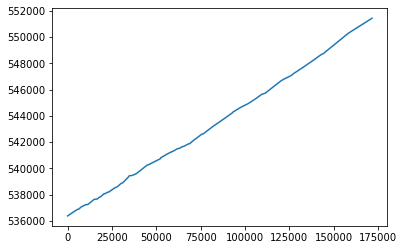

In [34]:
X['InvoiceNo'].plot()

In [35]:
X.sort_index(inplace=True)

In [36]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,NaN,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom
5546,536865,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-03 11:28:00,1.66,NaN,United Kingdom


## ADF Test
## Augmented Dickey–Fuller test

In [37]:
df=(df.resample('D').mean())
df=pd.DataFrame(df)
df= df.interpolate();
print(df)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller( X['InvoiceNo'].values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.0258308924504065
p-value: 1.0
Critial Values:
   1%, -3.540522678829176
Critial Values:
   5%, -2.9094272025108254
Critial Values:
   10%, -2.5923136524453696


In [39]:
X['InvoiceNo_DeTending'] = X['InvoiceNo'] - X['InvoiceNo'].shift()

In [40]:
X['InvoiceNo_DeTending'].head()

31      NaN
142      12
4272    374
5466    107
5546      2
Name: InvoiceNo_DeTending, dtype: object

In [41]:
X['InvoiceNo_DeTending'].fillna(X['InvoiceNo_DeTending'].median(),inplace=True)

<AxesSubplot:>

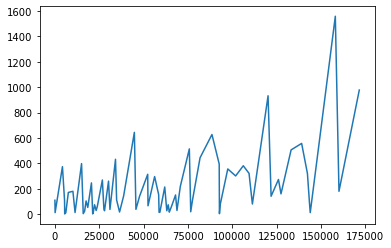

In [42]:
X['InvoiceNo_DeTending'].plot()

In [43]:
from pmdarima.model_selection import train_test_split
train, test = train_test_split(X['InvoiceNo_DeTending'], train_size=int(0.7 * X.shape[0]))

In [44]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_10002['Quantity'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Quantity'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

NameError: name 'df_10002' is not defined

# Apply Arima Method 

In [54]:
#Importing ARIMA from statsmodels 
from statsmodels.tsa.arima_model import ARIMA

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
data=np.asarray(train)
test1 = np.asarray(test)
data
test1

array([ 444.,  627.,  395.,    4.,   73.,  356.,  301.,  381.,  321.,
         80.,  932.,  141.,  273.,  160.,  506.,  557.,  320.,   96.,
         12., 1558.,  180.,  977.])

In [56]:
model_arima = ARIMA(data,order=(1,0,0))

In [57]:
train_size = int(0.70* X.shape[0])
test_size = df.shape[0] - train_size

In [58]:
model_arima_fit= model_arima.fit()
predict = model_arima_fit.forecast(test_size)
predict

(array([130.33487165, 126.54171533, 127.13296706, ..., 127.05323483,
        127.05323483, 127.05323483]),
 array([142.71809203, 144.44146055, 144.48307655, ..., 144.4841127 ,
        144.4841127 , 144.4841127 ]),
 array([[-149.38744868,  410.05719197],
        [-156.55834521,  409.64177588],
        [-156.04865935,  410.31459347],
        ...,
        [-156.13042239,  410.23689206],
        [-156.13042239,  410.23689206],
        [-156.13042239,  410.23689206]]))

In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

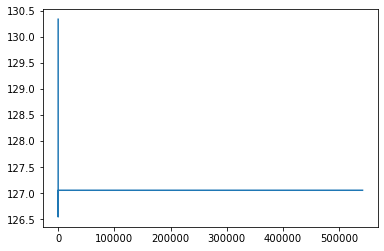

In [60]:
plt.plot(range(predict[0].shape[0]),predict[0])

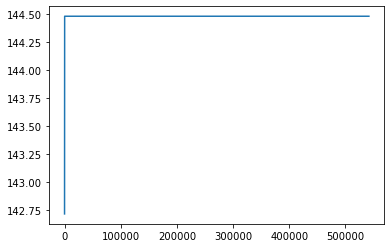

In [61]:
plt.plot(range(predict[1].shape[0]),predict[1])

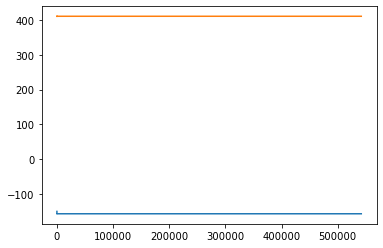

In [62]:
plt.plot(range(predict[2].shape[0]),predict[2])

In [63]:
X = df_10002['Quantity']
size = int(len(X) * 0.66) # 0.7 , 0.8 , 0.9
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

NameError: name 'df_10002' is not defined

In [64]:
predictions = list()
for t in range(len(test)):
  #5,1,0 #5,1,1, 4,1,0, 2,1,0  0,1,2  2,1,1
  #2,2,1 1,1,0 5,1,1  4,1,0   10,1,5
  # 5,1,4
	model = ARIMA(history, order=(10,1,6))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() # predict one future value
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

NameError: name 'history' is not defined

In [3]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

NameError: name 'test' is not defined